In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



In [2]:
df = pd.read_csv("/kaggle/input/iris-flower-dataset/IRIS.csv")
 

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


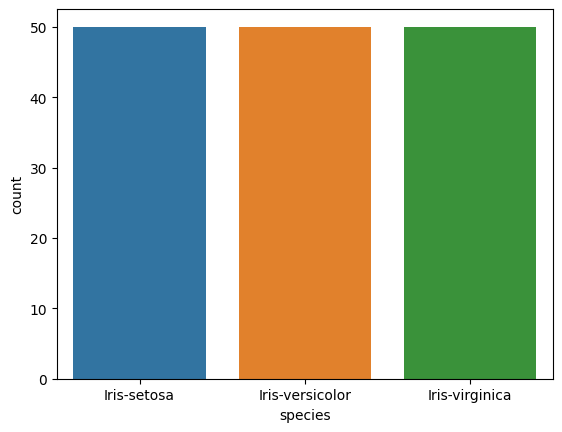

In [4]:
sns.countplot(x="species",data=df)
plt.show()

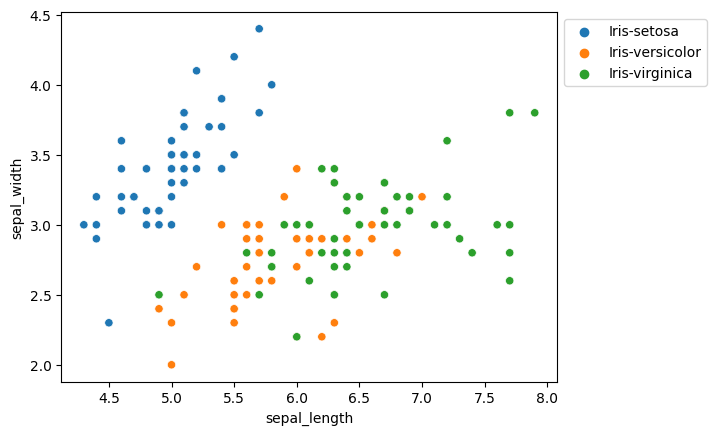

In [5]:
sns.scatterplot(data=df, x="sepal_length", y="sepal_width",hue="species")
plt.legend(bbox_to_anchor=(1,1),loc=2)
plt.show()

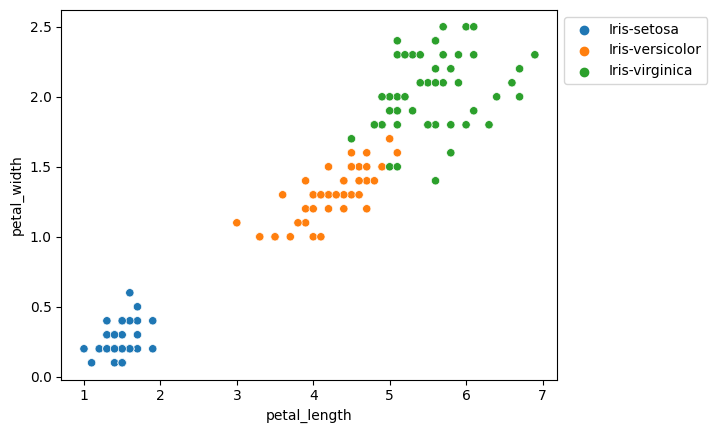

In [6]:
sns.scatterplot(data=df, x="petal_length", y="petal_width",hue="species")
plt.legend(bbox_to_anchor=(1,1),loc=2)
plt.show()

#  Features Correlation

In [7]:
df["species"].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

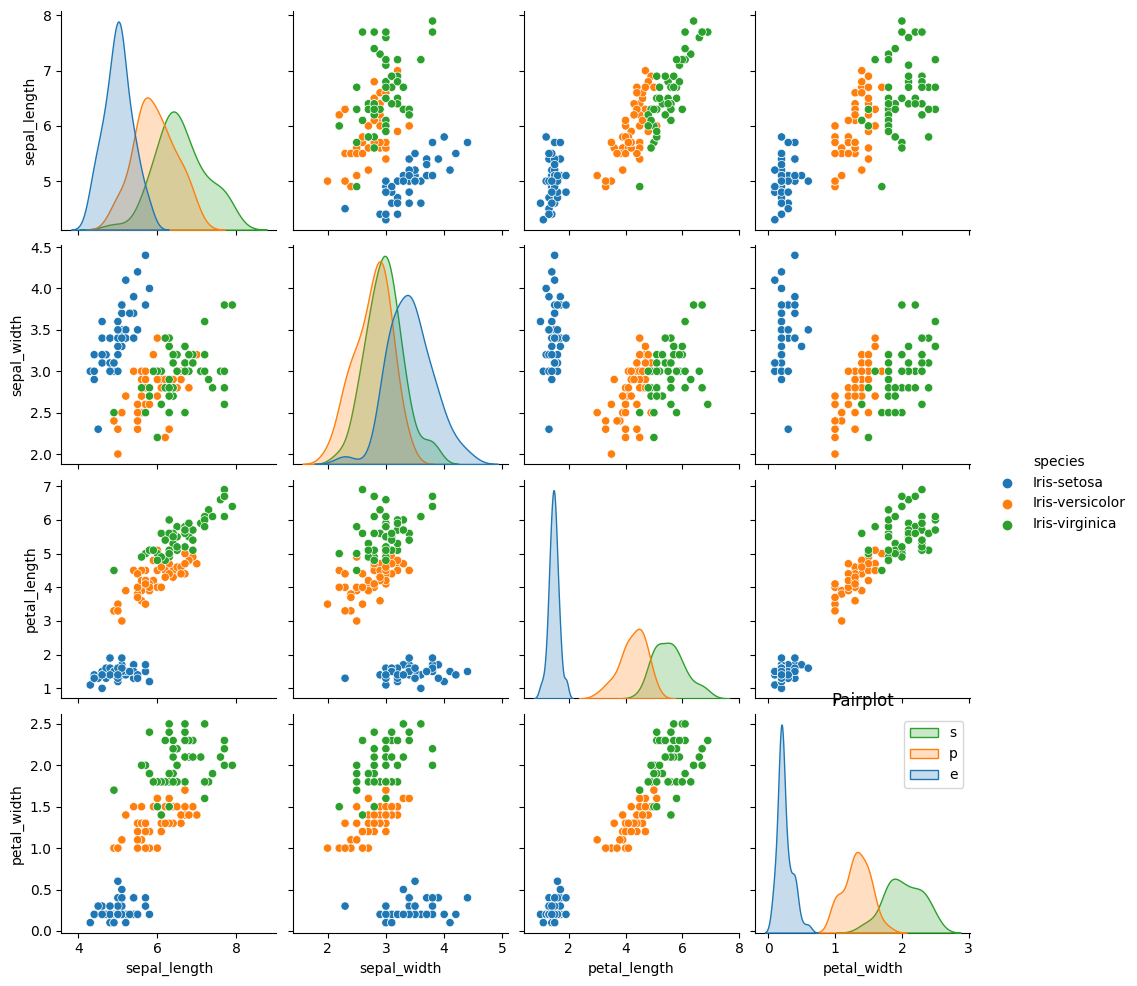

In [8]:
setosa=df[df["species"]=="Iris-setosa"]
versicolor=df[df["species"]=="Iris-versicolor"]
virginica=df[df["species"]=="Iris-virginica"]
combine=pd.concat([setosa,versicolor,virginica])
sns.pairplot(combine,hue="species",diag_kind="kde")
plt.legend("species")
plt.title("Pairplot")
plt.show()

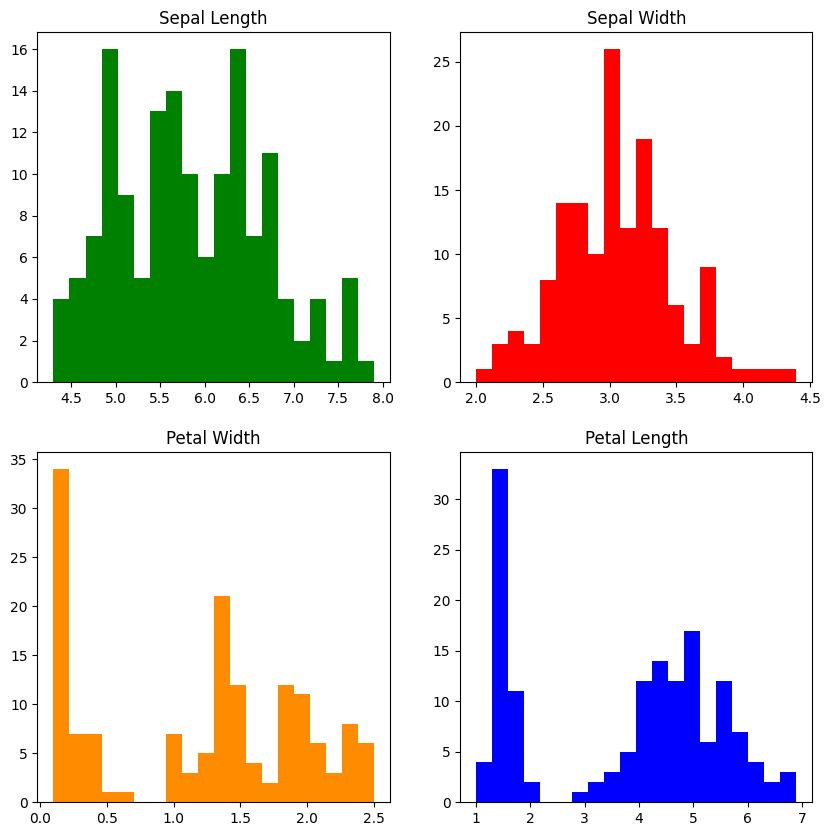

In [9]:
fig,ax=plt.subplots(2,2,figsize=(10,10))
ax[0,0].set_title("Sepal Length")
ax[0,0].hist(df["sepal_length"],bins=20,color="green")

ax[0,1].set_title("Sepal Width")
ax[0,1].hist(df["sepal_width"],bins=20,color="red")

ax[1,0].set_title("Petal Width")
ax[1,0].hist(df["petal_width"],bins=20,color="darkorange")

ax[1,1].set_title("Petal Length")
ax[1,1].hist(df["petal_length"],bins=20,color="blue")
plt.show()

# Histograms with Distplot Plot


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) 

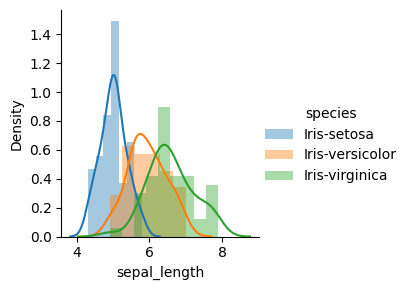

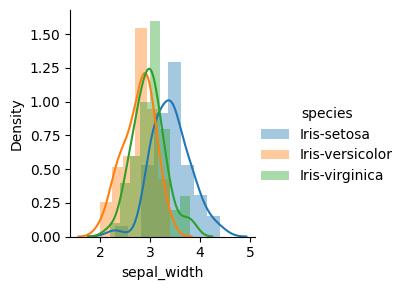

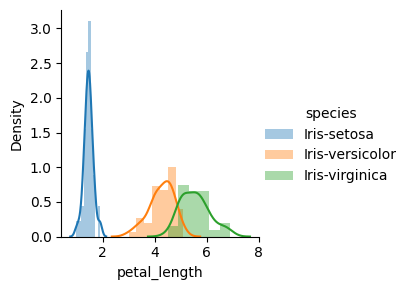

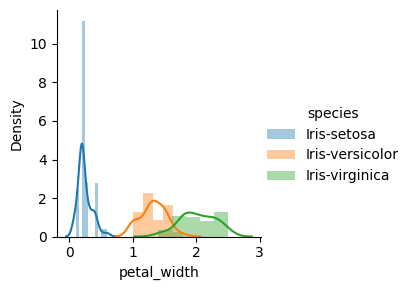

In [10]:
plot=sns.FacetGrid(df,hue="species")
plot.map(sns.distplot,"sepal_length").add_legend()

plot=sns.FacetGrid(df,hue="species")
plot.map(sns.distplot,"sepal_width").add_legend()

plot=sns.FacetGrid(df,hue="species")
plot.map(sns.distplot,"petal_length").add_legend()

plot=sns.FacetGrid(df,hue="species")
plot.map(sns.distplot,"petal_width").add_legend()
plt.show()

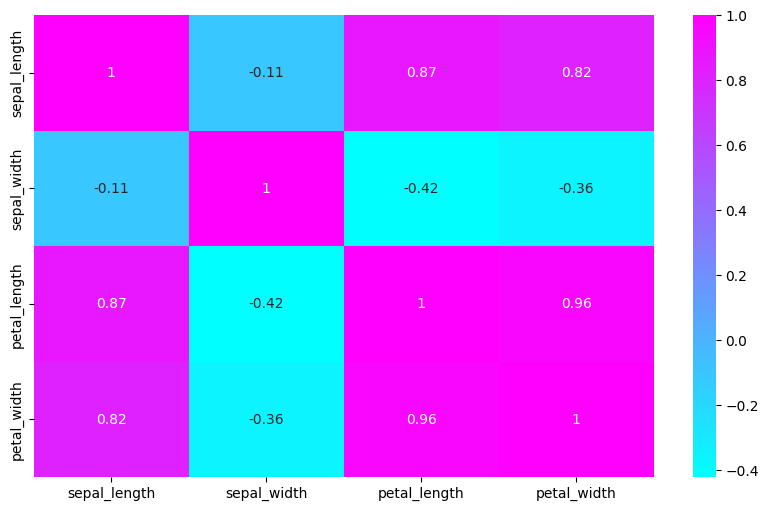

In [11]:
plt.figure(figsize=(10,6))
corr=df[["sepal_length","sepal_width","petal_length","petal_width"]].corr()
sns.heatmap(corr,annot=True,cmap="cool")
plt.show()

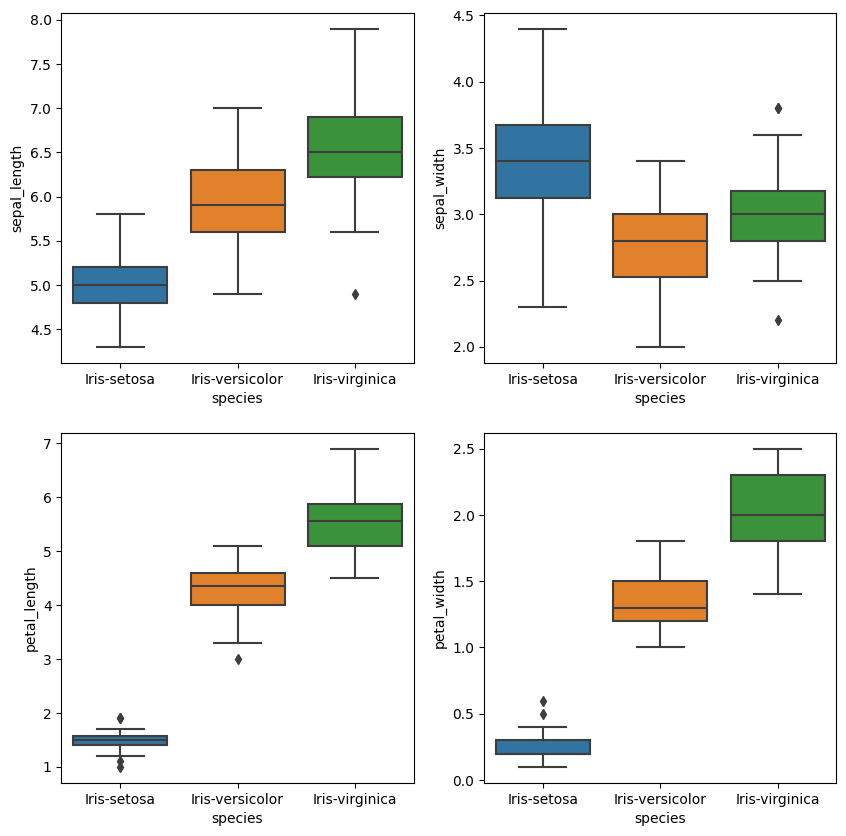

In [12]:
def graph(y):
    sns.boxplot(x="species",y=y,data=df)
    
plt.figure(figsize=(10,10))

plt.subplot(221)
graph("sepal_length")


plt.subplot(222)
graph("sepal_width")



plt.subplot(223)
graph("petal_length")



plt.subplot(224)
graph("petal_width")

plt.show()

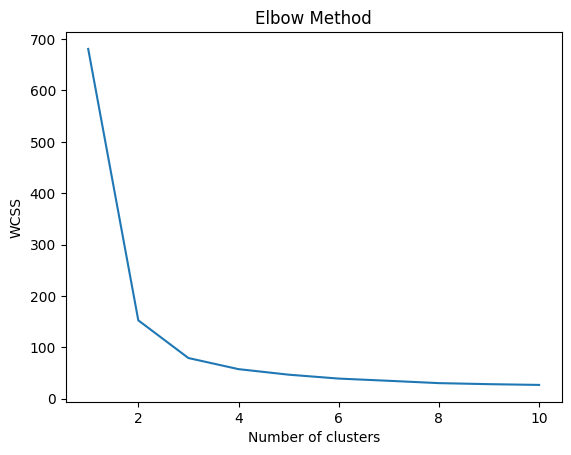

In [13]:
from sklearn.cluster import KMeans
X = df.iloc[:,:-1].values


wcss = [] 

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotting the elbow curve
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [14]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [15]:
! pip install kneed

<Figure size 1000x600 with 0 Axes>

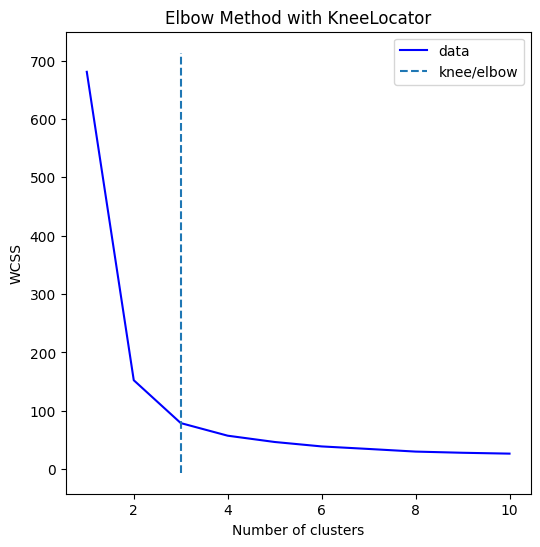

Optimal number of clusters: 3


In [16]:
from kneed import KneeLocator


kn = KneeLocator(range(1, 11), wcss, curve='convex', direction='decreasing')

# Plotting the knee
plt.figure(figsize=(10,6))
kn.plot_knee()
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method with KneeLocator')
plt.show()


print("Optimal number of clusters:", kn.knee)


# Implementing K-Means Clustering

In [26]:
df1=df.drop(columns="species",axis=1)
from sklearn.preprocessing import OneHotEncoder 
encoder=OneHotEncoder()
cat_data=df[["species"]]
encode_categorical=encoder.fit_transform(cat_data).toarray()
encoded_df=pd.DataFrame(encode_categorical,columns=encoder.get_feature_names_out(["species"]))
final_df=pd.concat([df1,encoded_df],axis=1)
final_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species_Iris-setosa,species_Iris-versicolor,species_Iris-virginica
0,5.1,3.5,1.4,0.2,1.0,0.0,0.0
1,4.9,3.0,1.4,0.2,1.0,0.0,0.0
2,4.7,3.2,1.3,0.2,1.0,0.0,0.0
3,4.6,3.1,1.5,0.2,1.0,0.0,0.0
4,5.0,3.6,1.4,0.2,1.0,0.0,0.0


In [28]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
pred1=kmeans.fit_predict(final_df)

In [34]:
centriod = kmeans.cluster_centers_
centriod

array([[ 6.62244898e+00,  2.98367347e+00,  5.57346939e+00,
         2.03265306e+00, -1.66533454e-16, -1.66533454e-16,
         1.00000000e+00],
       [ 5.00600000e+00,  3.41800000e+00,  1.46400000e+00,
         2.44000000e-01,  1.00000000e+00, -1.66533454e-16,
        -1.66533454e-16],
       [ 5.91568627e+00,  2.76470588e+00,  4.26470588e+00,
         1.33333333e+00, -1.66533454e-16,  9.80392157e-01,
         1.96078431e-02]])

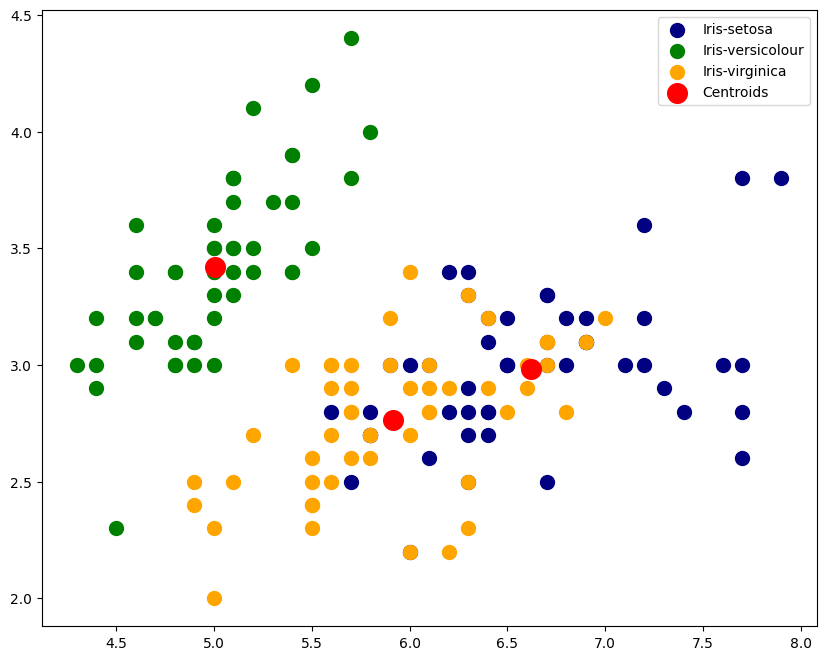

In [36]:
plt.figure(figsize=(10,8))
plt.scatter(final_df.iloc[pred1 == 0, 0], final_df.iloc[pred1 == 0, 1], s = 100, c = 'navy', label = 'Iris-setosa')
plt.scatter(final_df.iloc[pred1 == 1, 0], final_df.iloc[pred1 == 1, 1], s = 100, c = 'green', label = 'Iris-versicolour')
plt.scatter(final_df.iloc[pred1 == 2, 0], final_df.iloc[pred1 == 2, 1], s = 100, c = 'orange', label = 'Iris-virginica')
plt.scatter(centriod[:, 0], centriod[:,1], s = 200, c = 'red', label = 'Centroids')
plt.legend(loc="best")
plt.show()


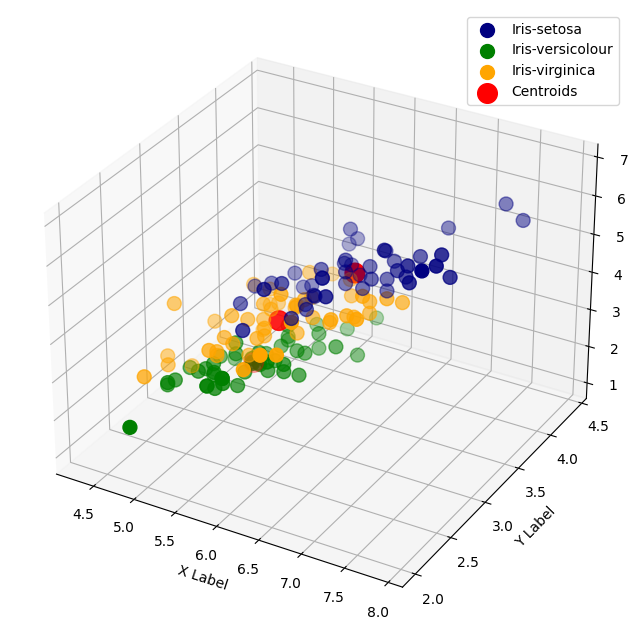

In [37]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(final_df.iloc[pred1 == 0, 0], final_df.iloc[pred1 == 0, 1], final_df.iloc[pred1 == 0, 2], s=100, c='navy', label='Iris-setosa')
ax.scatter(final_df.iloc[pred1 == 1, 0], final_df.iloc[pred1 == 1, 1], final_df.iloc[pred1 == 1, 2], s=100, c='green', label='Iris-versicolour')
ax.scatter(final_df.iloc[pred1 == 2, 0], final_df.iloc[pred1 == 2, 1], final_df.iloc[pred1 == 2, 2], s=100, c='orange', label='Iris-virginica')
ax.scatter(centriod[:, 0], centriod[:, 1], centriod[:, 2], s=200, c='red', label='Centroids')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.legend(loc="best")
plt.show()
